In [1]:
from __future__ import print_function
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binned_statistic

### Properties of the BA model

Power-law degree distribution: $P(k) = \frac{2m^2}{k^3}$

# Implementing the Barabási-Albert (BA) model

The Barabási-Albert scale-free network model is a model of network growth, 

where new nodes continuously enter the network and make links to existing nodes with a probability that is
linearly proportional to their degree. The steps required for generating a Barabási-Albert scale-
free network with N nodes are as follows:

1) Create a small seed network which has at least m nodes, 
- where m is the number of links a new node creates to already existing nodes. For the propose of this exercise, use 3-clique as the seed network.

2) Add new nodes to the network until your network has $N$ nodes, such that each entering node has $m$ links and connects to existing nodes proportional to their degrees, chosen with a probability 

$$p_i = \frac{k_i}{\sum_i k_i}$$

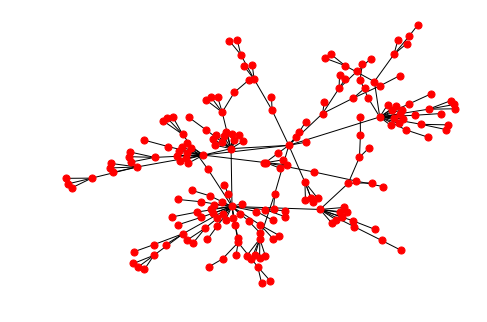

In [2]:
def lin_log_bins(max_degree):
    # lin-log binning: for k=1..10 use linear bins, then logarithmic bins
    # have the number of logbins such that there are 10 bins per decade

    num_logbins = int(np.log10(1.5 * max_degree) - np.log10(1.5)) * 10

    # generate log bins from k=1.5 to k=1.5*max(degree)
    bins = np.logspace(
        np.log10(1.5), np.log10(1.5 * max_degree), num_logbins)

    return bins

def ba_network(n, m, seedsize=3):
    """
    n: final number of nodes
    m: number of links 
    """
    # Generate initial small seed network (clique of seedside nodes)
    net = nx.complete_graph(seedsize)
    
    # list of nodes to select from,
    # each node appear as frequent as the number of degree
    node_pool = list(net.node) + list(net.node)
    next_node = seedsize # initialize the next node
    while next_node < n:
        # randomly select m nodes from existing nodes ?
        targets = np.random.choice(node_pool, m, replace=False)
        # attached next node to the randomly selected #m target(s)
        net.add_edges_from(zip([next_node]*m, targets))

        # preferencial treatment here
        node_pool.extend(targets)
        node_pool.extend([next_node]*m)

        next_node += 1

    return net

net = ba_network(200,1)

nx.draw(net, node_size=50)

### Compare with `networkx.barabasi_albert_graph` inbuild function

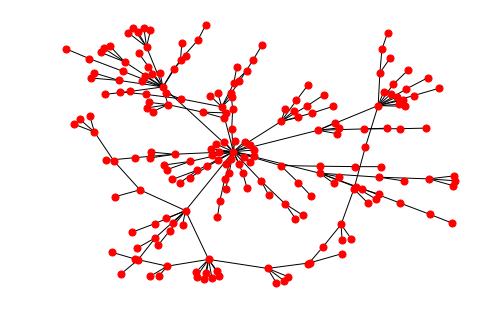

In [3]:
nx.draw(nx.barabasi_albert_graph(200, 1), node_size=50)

### Part a or something

- **Generate** a new network using parameters $N = 10^4$ with $m = 2$ and plot the
logarithmically binned probability density function for degree, $P(k)$ (on double logarithmic
axes, `ax.loglog`).
- **Compare** your result with the theoretical prediction of $P(k) = 2m (m + 1) / [k (k + 1) (k + 2)]$
(shown in the next exercise). 
- **Plot** both the experimental and theoretical distributions on the same axes.


The maximum degree is:  24
The total number of edges is:  200


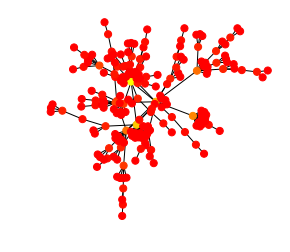

In [4]:
np.random.seed(42)

# part a
fig = plt.figure()
ax = fig.add_subplot(111)

net = ba_network(200, 1)
nodes = net.nodes()
degrees_dict = nx.degree(net)
degrees = [degrees_dict[node] for node in nodes]

print("The maximum degree is: ", max(degrees))
print("The total number of edges is: ", len(net.edges()))

nx.draw_spring(
    net, node_size=50, node_color=degrees, cmap='autumn',
    vmin=np.min(degrees), vmax=np.max(degrees))
ax.set_aspect('equal')

figure_filename = 'BA_visualized.pdf'


fig.savefig(figure_filename)
# or just use plt.show() and save manually

### part b or something

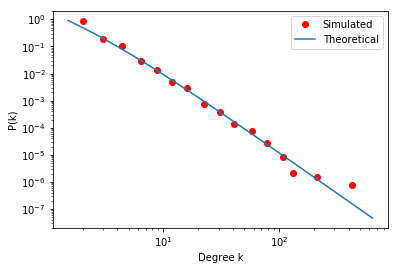

In [5]:
# part b
net = ba_network(10000, 2)
degrees = [deg for _, deg in nx.degree(net)]

fig = plt.figure()
ax = fig.add_subplot(111)

# so use np.histogram to get histogram and bin edges
bins = lin_log_bins(max(degrees))
pk, bin_edges = np.histogram(degrees, bins=bins, density=True)

bincenters, _, _ = binned_statistic(
    degrees, degrees, statistic='mean', bins=bins)
ax.set_xlabel('Degree k')
ax.set_ylabel('P(k)')

ax.loglog(bincenters, pk, 'ro', label='Simulated')
ax.loglog(bins, 2 * 2 * (2 + 1) /
          (bins * (bins + 1) * (bins + 2)),
          label='Theoretical')

ax.legend()

figure_filename = 'BA_degree_distribution.pdf'


fig.savefig(figure_filename)

# or just use plt.show() and save manually